# **HYPOTHESIS TESTING**

## Objective

To analyze how demographic and lifestyle factors—such as age, sex, BMI, number of children, smoking status, and region—affect health insurance charges using statistical tests and data visualization.

## Input

- A cleaned dataset (`cleaned_insurance.csv`) containing 1,337 records with the following columns:
    - age, sex, bmi, children, smoker, region, charges, bmi_category

## Output

- Statistical summaries and hypothesis test results for each factor
- Visualizations (boxplots) illustrating the impact of each variable on insurance charges
- A consolidated table and summary of findings

---

## Import packages and Load Cleaned Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
# Load dataset
df = pd.read_csv("data/cleaned_insurance.csv")

# Preview data
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Over weight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Over weight


- The dataset contains 1,337 insurance records, with detailed information on age, sex, BMI, children, smoking status, region, charges, and BMI category.

----

## Research methodology

Testing hypotheses to determine the relationship between features

**Hypotheses:**

1. Smoking impacts on insurance charges

2. BMI category impacts on insurance charges

3. Number of children impacts  on insurance charges

4. Region impacts on insurance charges 

-----

## Hypothesis 1: Smokers vs. Non-Smokers
**Null Hypothesis (H₀):** Smokers and non-smokers have the same average insurance charges.

In [8]:
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']

In [9]:
# T-test
t_stat, p_val = ttest_ind(smoker_charges, non_smoker_charges)
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 46.64479459840305
P-value: 1.4067220949376498e-282


**Key observations:** 
* The t-test resulted in a p-value of 1.40 × 10⁻²⁸², which is far below the 0.05 significance threshold.
* Therefore, we reject the null hypothesis (H₀) and conclude that there is a statistically significant difference in insurance charges between smokers and non-smokers.
* In fact, smokers tend to have substantially higher insurance charges compared to non-smokers, indicating that smoking is one of the strongest predictors of medical costs in this dataset.

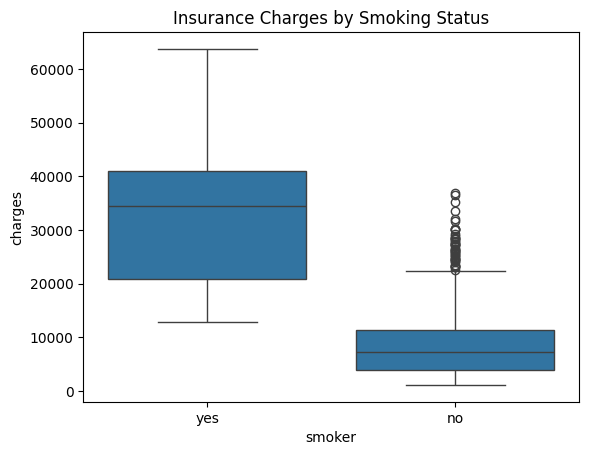

In [10]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Insurance Charges by Smoking Status")
plt.show()

**Key observations:**
* The boxplot shows that smokers have a much higher median and wider spread of insurance charges compared to non-smokers.
* There are several high-value outliers among smokers, indicating some individuals incur exceptionally high costs.
* Non-smokers generally have lower and less variable charges, with fewer extreme values.

---

## Hypothesis 2: BMI Category and Charges
**H₀:** Insurance charges are the same across BMI categories.

In [11]:
model = ols('charges ~ C(bmi_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq      df         F        PR(>F)
C(bmi_category)  7.625227e+09     3.0  17.99202  1.895908e-11
Residual         1.883136e+11  1333.0       NaN           NaN


**Key observations:**
* The ANOVA test for BMI category and insurance charges produced a p-value of 1.89 × 10⁻¹¹, which is well below the 0.05 threshold.
* This means we reject the null hypothesis and conclude that at least one BMI category has significantly different insurance charges..

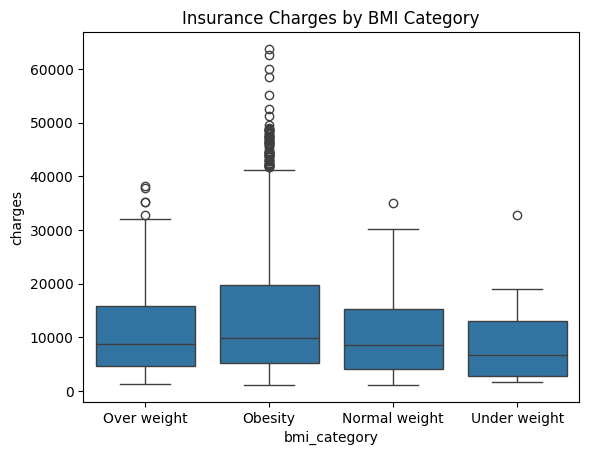

In [12]:
sns.boxplot(x='bmi_category', y='charges', data=df)
plt.title("Insurance Charges by BMI Category")
plt.show()

**key observation:**
- The boxplot reveals a clear upward trend in insurance charges as BMI category increases.
- Individuals in the "Obesity" category have the highest median charges and the widest spread, indicating greater variability and more high-cost outliers.
- "Normal weight" and "Under weight" categories show lower and less variable charges, with fewer extreme values.
- The results suggest that higher BMI is associated with increased insurance costs, likely reflecting elevated health risks and medical expenses in these groups.

----

## Hypothesis 3: Number of Children and Charges
**H₀:** Insurance charges are the same regardless of number of children.

In [14]:
model = ols('charges ~ C(children)', data=df).fit()
anova_children = sm.stats.anova_lm(model, typ=2)
print(anova_children)

                   sum_sq      df         F    PR(>F)
C(children)  2.376795e+09     5.0  3.268734  0.006133
Residual     1.935620e+11  1331.0       NaN       NaN


**Key observation:**
* The ANOVA test for the number of children and insurance charges yielded a p-value of 0.0061, which is below the 0.05 significance level. 
* This means we reject the null hypothesis and conclude that the number of children has a statistically significant effect on insurance charges. 
* However, compared to smoking or BMI, the effect size (F = 3.27) suggests that the impact of children on charges is weaker and may not be as practically meaningful.

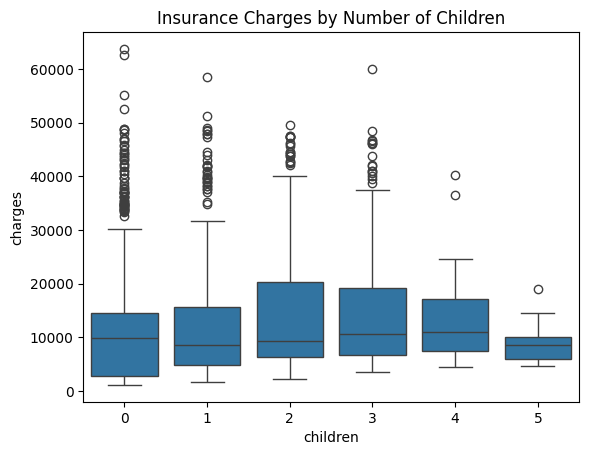

In [15]:
sns.boxplot(x='children', y='charges', data=df)
plt.title("Insurance Charges by Number of Children")
plt.show()

**Key observatin:**
- The boxplot demonstrates that insurance charges do not vary dramatically across different numbers of children, with median charges remaining relatively stable.
- There is slightly higher variability and more outliers among those with 0 children, possibly reflecting a mix of younger individuals and high-cost cases.
- Overall, while the ANOVA test indicated statistical significance, the practical differences in charges between groups are modest compared to other factors like smoking or BMI.

---

## Hypothesis 4: Region and Charges
**H₀:** Average charges are the same across regions.

In [16]:
model = ols('charges ~ C(region)', data=df).fit()
anova_region = sm.stats.anova_lm(model, typ=2)
print(anova_region)

                 sum_sq      df        F    PR(>F)
C(region)  1.281906e+09     3.0  2.92614  0.032763
Residual   1.946569e+11  1333.0      NaN       NaN


**Key observation:**
* The ANOVA test for region and insurance charges resulted in a p-value of 0.0328, which is below the 0.05 threshold. 
* Therefore, we reject the null hypothesis and conclude that insurance charges differ significantly across regions. 
* However, the effect size (F = 2.93) is relatively small compared to smoking or BMI, suggesting that while regional differences exist, their impact on charges is less pronounced.

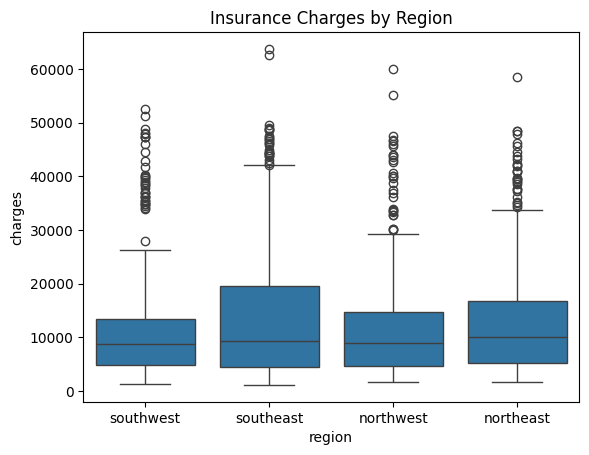

In [17]:
sns.boxplot(x='region', y='charges', data=df)
plt.title("Insurance Charges by Region")
plt.show()

**Key observation:**
- The boxplot illustrates that insurance charges vary across regions, but the differences are less pronounced than for other factors like smoking or BMI.
- Median charges are relatively similar among regions, with some variation in the spread and presence of outliers.
- The southeast region appears to have a slightly higher concentration of high-cost outliers.
- Overall, while region has a statistically significant effect on charges, its practical impact is modest compared to other predictors.

---

## Consolidated research results

| Index | Hypothesis                                      | Method         | p-value         | Interpretation                |
|-------|-------------------------------------------------|----------------|-----------------|-------------------------------|
| 1     | Smoking status and Charges                      | T-test         | 1.41e-282       | Reject null                   |
| 2     | BMI Category and Charges                        | ANOVA          | 1.90e-11        | Reject null                   |
| 3     | Number of Children and Charges                  | ANOVA          | 0.0061          | Reject null                   |
| 4     | Region and Charges                              | ANOVA          | 0.0328          | Reject null                   |

----

## Overall Summary

This notebook presents a comprehensive statistical analysis of insurance charges using a dataset of 1,337 records. The analysis explores the impact of several factors—smoking status, BMI category, number of children, and region—on insurance costs.

- **Smoking status** is the strongest predictor, with smokers incurring significantly higher charges than non-smokers (p-value ≈ 1.41 × 10⁻²⁸²).
- **BMI category** also shows a substantial effect, with higher BMI associated with increased charges (p-value ≈ 1.90 × 10⁻¹¹).
- **Number of children** has a statistically significant but weaker effect on charges (p-value ≈ 0.0061), with practical differences between groups being modest.
- **Region** influences charges to a lesser extent (p-value ≈ 0.0328), with only small differences observed across regions.

Visualizations and statistical tests consistently demonstrate that lifestyle factors such as smoking and BMI are the most influential drivers of insurance costs in this dataset. The findings highlight the importance of these variables in risk assessment and pricing for health insurance.

-----